In [41]:
import tensorflow as tf
import os
import cv2
import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
# loading image data...
def data_loader(folder_dir):
    # folder_dir = "./data/images/"
    image_dataset = []
    mask_dataset = []
    maskInf = []
    for dir in os.listdir('./data/images'):
        numImages = 0
        for images in os.listdir(folder_dir+'/images/'+dir):
            try:
                image = cv2.imread(folder_dir+'/images/'+dir+'/'+images, 1)
                # print(folder_dir+'/images/'+dir+'/'+images)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (512, 256))
                image = Image.fromarray(image)
                image = np.array(image)
                image_dataset.append(image)
                numImages += 1
            except:
                print('jpeg error')
            
        mask = cv2.imread(folder_dir+'/masks/' + dir + '_mask.png', 1)
        mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
        mask = cv2.resize(mask, (512, 256))
        mask = Image.fromarray(mask)
        mask = np.array(mask)
        mask_dataset.append(mask)
        maskInf.append([len(mask_dataset) - 1, numImages])
    return image_dataset, mask_dataset, maskInf

In [42]:
img_height = 4032
img_width = 3024

image_dataset, mask_dataset, maskInf = data_loader("./data")
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)
mask_dataset.shape
image_dataset.shape

Premature end of JPEG file
Premature end of JPEG file


jpeg error


Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
P

(11205, 256, 512, 3)

In [46]:
print(((mask_dataset[0] < 255).astype(int))[:,:,0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [53]:
def rgb_to_labels(img):
  test=0
  zeros=0
  new_img = (img < 255).astype(int)
  new_img = new_img[:,:,0].tolist()
  for x in range(0, len(new_img)):
    for y in range(0, len(new_img[x])):
      if new_img[x][y] == 1:
        new_img[x][y] = [1,0]
      else:
        new_img[x][y] = [0,1]

  return new_img

labels = np.repeat([np.array(rgb_to_labels(mask_dataset[0]))], maskInf[0][1], axis=0)
maskInf.pop(0)

for mask in maskInf:
  print(mask)
  a = np.repeat([np.array(rgb_to_labels(mask_dataset[mask[0]]))], mask[1], axis=0)
  print(a.shape)
  labels = np.concatenate((labels, a),axis=0)
# coppies the mask image 1221 times for each image to create the labels
# labels = np.repeat([np.array(rgb_to_labels(mask_dataset[0]))], 451, axis=0)
print(labels.shape)
# for i in range(mask_dataset.shape[0]):
#   label = rgb_to_labels(mask_dataset[i]) # calling rgb to labels for each images...
#   np.append(labels, label, axis=0)



[1, 801]
(801, 256, 512, 2)
[2, 1050]
(1050, 256, 512, 2)
[3, 1617]
(1617, 256, 512, 2)
[4, 2255]
(2255, 256, 512, 2)
[5, 1213]
(1213, 256, 512, 2)
[6, 205]
(205, 256, 512, 2)
[7, 2236]
(2236, 256, 512, 2)
[8, 479]
(479, 256, 512, 2)
[9, 838]
(838, 256, 512, 2)
(11205, 256, 512, 2)


In [57]:

labels[0].shape
print(labels[0])

[[[0 1]
  [0 1]
  [0 1]
  ...
  [0 1]
  [0 1]
  [0 1]]

 [[0 1]
  [0 1]
  [0 1]
  ...
  [0 1]
  [0 1]
  [0 1]]

 [[0 1]
  [0 1]
  [0 1]
  ...
  [0 1]
  [0 1]
  [0 1]]

 ...

 [[1 0]
  [1 0]
  [1 0]
  ...
  [1 0]
  [1 0]
  [1 0]]

 [[1 0]
  [1 0]
  [1 0]
  ...
  [1 0]
  [1 0]
  [1 0]]

 [[1 0]
  [1 0]
  [1 0]
  ...
  [1 0]
  [1 0]
  [1 0]]]


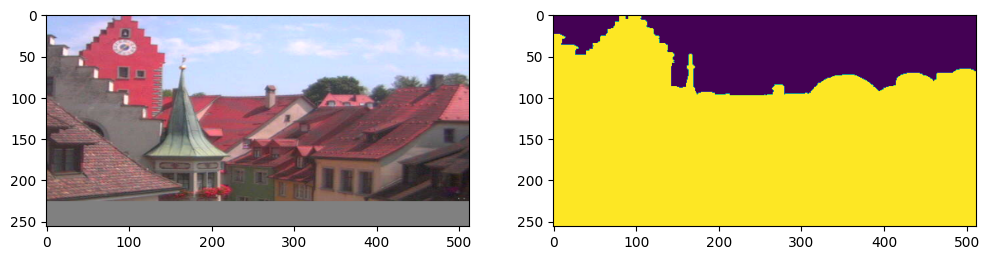

In [76]:
#Another Sanity check...
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()

In [77]:
print(labels.shape)

(11205, 256, 512, 2)


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels, test_size = 0.20, random_state = 42) # train test split for data...

# Model Architecture

![Fast-SCNN Architecture](https://github.com/DeepVoltaire/Fast-SCNN/raw/master/figures/fast-scnn.png)

#### Custom function for conv2d: conv_block

In [79]:
def conv_block(inputs, conv_type, kernel, kernel_size, strides, padding='same', relu=True):

  if(conv_type == 'ds'):
    x = tf.keras.layers.SeparableConv2D(kernel, kernel_size, padding=padding, strides = strides)(inputs)
  else:
    x = tf.keras.layers.Conv2D(kernel, kernel_size, padding=padding, strides = strides)(inputs)

  x = tf.keras.layers.BatchNormalization()(x)

  if (relu):
    x = tf.keras.activations.relu(x)

  return x

## Step 1: Learning to DownSample

In [80]:
# Input Layer
input_layer = tf.keras.layers.Input(shape=(256, 512,3), name = 'input_layer')

In [81]:
lds_layer = conv_block(input_layer, 'conv', 32, (3, 3), strides = (2, 2))
lds_layer = conv_block(lds_layer, 'ds', 48, (3, 3), strides = (2, 2))
lds_layer = conv_block(lds_layer, 'ds', 64, (3, 3), strides = (2, 2))

## Step 2: Global Feature Extractor

#### residual custom method

In [83]:
def _res_bottleneck(inputs, filters, kernel, t, s, r=False):


    tchannel = tf.keras.backend.int_shape(inputs)[-1] * t

    x = conv_block(inputs, 'conv', tchannel, (1, 1), strides=(1, 1))

    x = tf.keras.layers.DepthwiseConv2D(kernel, strides=(s, s), depth_multiplier=1, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)

    x = conv_block(x, 'conv', filters, (1, 1), strides=(1, 1), padding='same', relu=False)

    if r:
        x = tf.keras.layers.add([x, inputs])
    return x

#### Bottleneck custom method

In [84]:
def bottleneck_block(inputs, filters, kernel, t, strides, n):
  x = _res_bottleneck(inputs, filters, kernel, t, strides)

  for i in range(1, n):
    x = _res_bottleneck(x, filters, kernel, t, 1, True)

  return x

#### PPM Method

In [85]:
def pyramid_pooling_block(input_tensor, bin_sizes):
  concat_list = [input_tensor]
  w = 8
  h = 16

  for bin_size in bin_sizes:
    x = tf.keras.layers.AveragePooling2D(pool_size=(w//bin_size, h//bin_size), strides=(w//bin_size, h//bin_size))(input_tensor)
    x = tf.keras.layers.Conv2D(128, 3, 2, padding='same')(x)
    x = tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (w,h)))(x)

    concat_list.append(x)

  return tf.keras.layers.concatenate(concat_list)

#### Assembling all the methods

In [86]:
gfe_layer = bottleneck_block(lds_layer, 64, (3, 3), t=6, strides=2, n=3)
gfe_layer = bottleneck_block(gfe_layer, 96, (3, 3), t=6, strides=2, n=3)
gfe_layer = bottleneck_block(gfe_layer, 128, (3, 3), t=6, strides=1, n=3)
gfe_layer = pyramid_pooling_block(gfe_layer, [2,4,6,8])

## Step 3: Feature Fusion

In [87]:
ff_layer1 = conv_block(lds_layer, 'conv', 128, (1,1), padding='same', strides= (1,1), relu=False)

In [88]:
ff_layer2 = tf.keras.layers.UpSampling2D((4, 4))(gfe_layer)
ff_layer2 = tf.keras.layers.DepthwiseConv2D((3,3), strides=(1, 1), depth_multiplier=1, padding='same')(ff_layer2)
ff_layer2 = tf.keras.layers.BatchNormalization()(ff_layer2)
ff_layer2 = tf.keras.activations.relu(ff_layer2)
ff_layer2 = tf.keras.layers.Conv2D(128, 1, 1, padding='same', activation=None)(ff_layer2)

In [89]:
ff_final = tf.keras.layers.add([ff_layer1, ff_layer2])
ff_final = tf.keras.layers.BatchNormalization()(ff_final)
ff_final = tf.keras.activations.relu(ff_final)

## Step 4: Classifier

In [90]:
classifier = tf.keras.layers.SeparableConv2D(128, (3, 3), padding='same', strides = (1, 1), name = 'DSConv1_classifier')(ff_final)
classifier = tf.keras.layers.BatchNormalization()(classifier)
classifier = tf.keras.activations.relu(classifier)

classifier = tf.keras.layers.SeparableConv2D(128, (3, 3), padding='same', strides = (1, 1), name = 'DSConv2_classifier')(classifier)
classifier = tf.keras.layers.BatchNormalization()(classifier)
classifier = tf.keras.activations.relu(classifier)


classifier = conv_block(classifier, 'conv', 2, (1, 1), strides=(1, 1), padding='same', relu=False)

classifier = tf.keras.layers.Dropout(0.3)(classifier)

classifier = tf.keras.layers.UpSampling2D((8, 8))(classifier)
classifier = tf.keras.activations.softmax(classifier)

## Model Compilation

In [92]:
fast_scnn = tf.keras.Model(inputs = input_layer , outputs = classifier, name = 'Fast_SCNN')
# optimizer = tf.keras.optimizers.SGD(momentum=0.9, learning_rate=0.045)
optimizer = tf.keras.optimizers.legacy.SGD(momentum=0.9, learning_rate=0.045)
fast_scnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [93]:
fast_scnn.summary()

Model: "Fast_SCNN"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 256, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 256, 32)         896       ['input_layer[0][0]']         
                                                                                                  
 batch_normalization (Batch  (None, 128, 256, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 tf.nn.relu (TFOpLambda)     (None, 128, 256, 32)         0         ['batch_normalization[

In [94]:
tf.keras.utils.plot_model(fast_scnn, show_layer_names=True, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [95]:
history = fast_scnn.fit(X_train,
          y_train,
          batch_size=32,
          epochs=20,
          verbose=1,
          validation_data=(X_test, y_test))

fast_scnn.save('./models/fast_scnn.keras')

Epoch 1/20
  1/281 [..............................] - ETA: 15:53 - loss: 1.0240 - accuracy: 0.4915

: 

1/1 [==============================] - 0s 26ms/step
(1, 256, 512, 2)


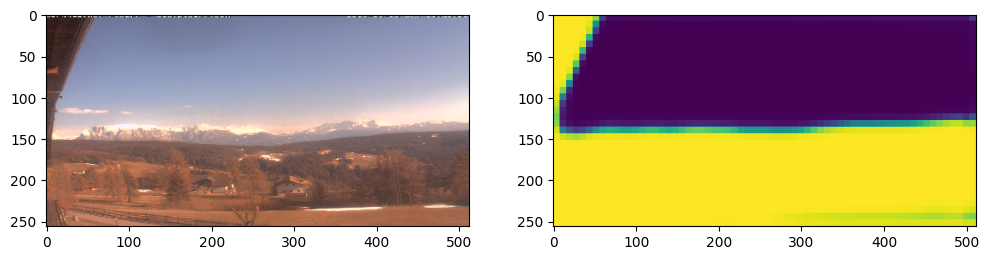

In [165]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

# randomly selecting an image from the test set and making prediction...
test_img_number = random.randint(0, len(X_test))
# test_img = X_test[test_img_number]
# ground_truth=y_test[test_img_number]
test_img = X_train[3]
ground_truth=y_test[3]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = fast_scnn.predict(test_img_input)
# prediction = create_mask(prediction)
# predicted_img=np.argmax(prediction, axis=3)
print(prediction.shape)

image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(prediction[0][:,:,0])
plt.show()